In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np

file_path = r"C:\Users\mrahm\Downloads\heart_disease\data\raw_data.csv"
df = pd.read_csv(file_path)

df.fillna({col: df[col].mode()[0] if df[col].dtype == 'object' else df[col].median() for col in df.columns}, inplace=True)


numerical_features = [ 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


categorical_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

correlation_matrix = df.corr()
correlation_threshold = 0.1  
important_features = correlation_matrix['target'].abs().sort_values(ascending=False)
selected_features = set(important_features[important_features > correlation_threshold].index)  
selected_features.update(['chol', 'fbs'])   
df_selected = df[list(selected_features)]

df_selected.to_csv("cleaned_data3.csv", index=False)

print("Data preprocessing complete. Cleaned data saved as 'cleaned_data3.csv'.")

Data preprocessing complete. Cleaned data saved as 'cleaned_data3.csv'.


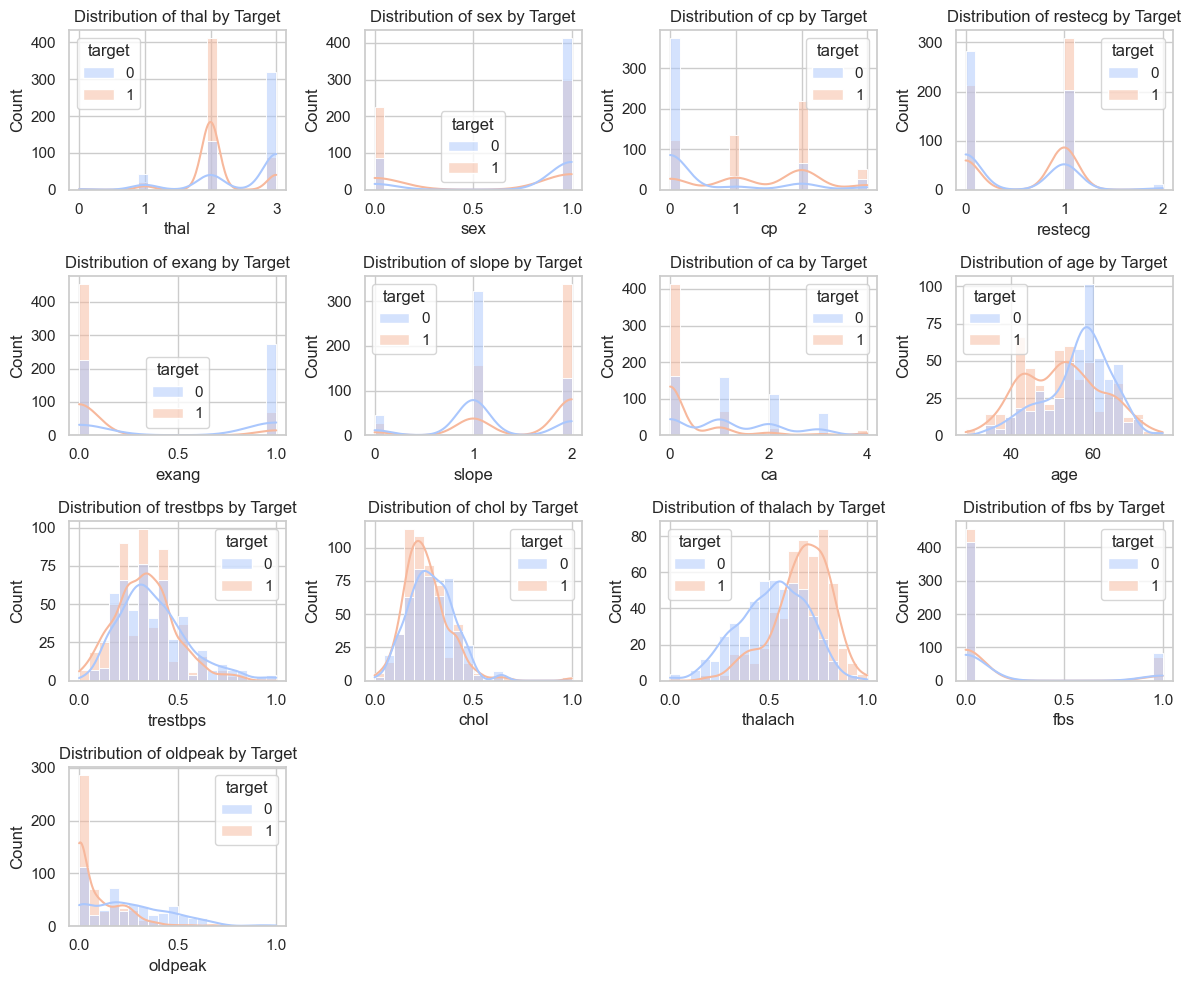

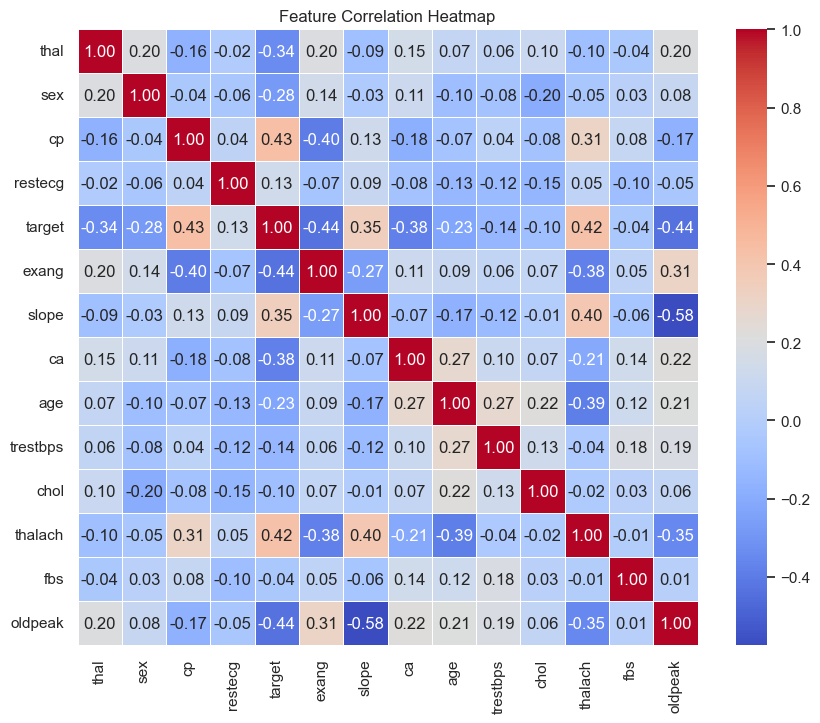

C:\Users\mrahm\AppData\Local\Temp\ipykernel_22284\4037918871.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected["target"].astype(str), y=df_selected[feature], palette="coolwarm")


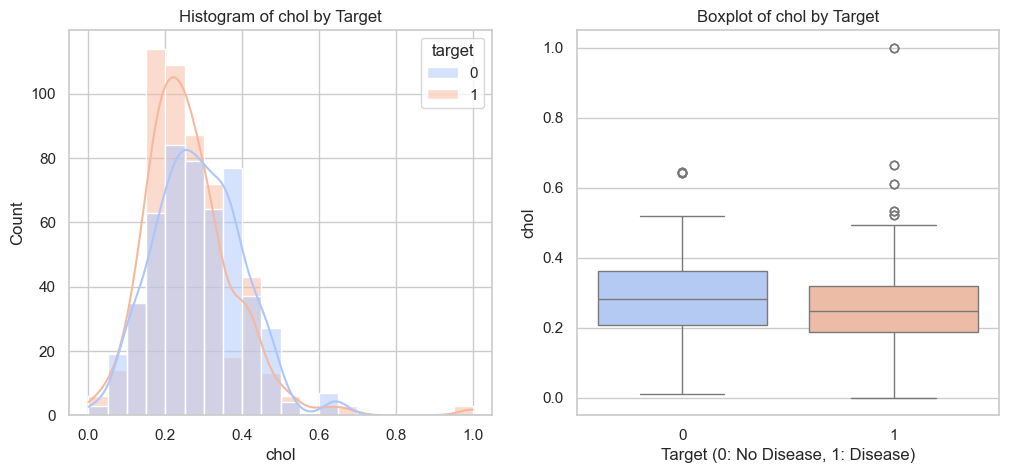

C:\Users\mrahm\AppData\Local\Temp\ipykernel_22284\4037918871.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected["target"].astype(str), y=df_selected[feature], palette="coolwarm")


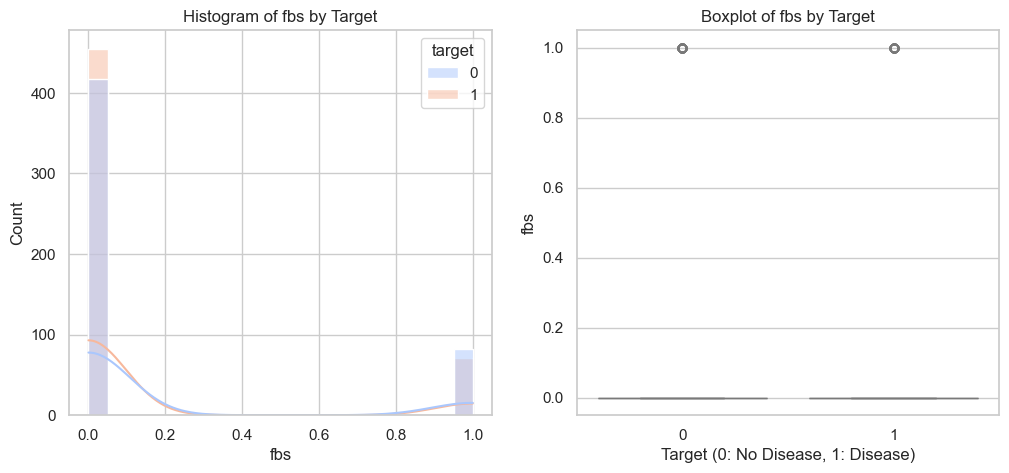

C:\Users\mrahm\AppData\Local\Temp\ipykernel_22284\4037918871.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected["target"].astype(str), y=df_selected[feature], palette="coolwarm")


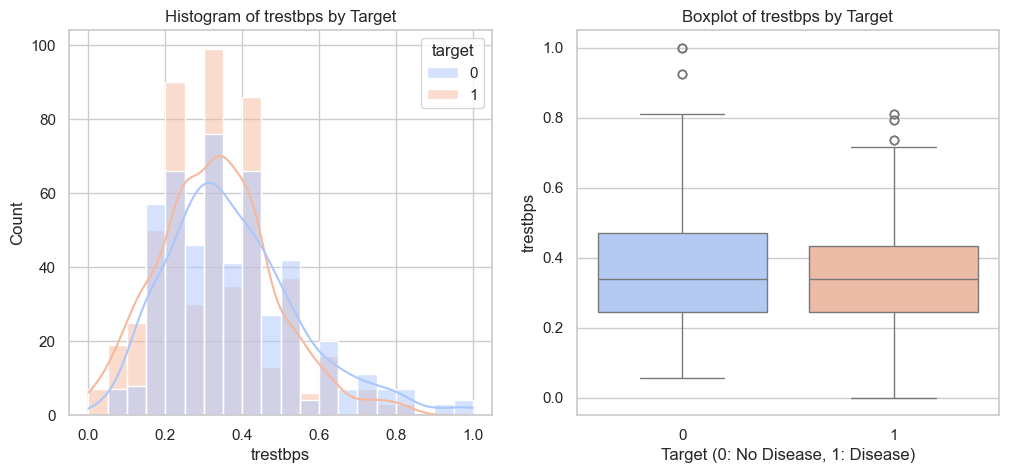

C:\Users\mrahm\AppData\Local\Temp\ipykernel_22284\4037918871.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected["target"].astype(str), y=df_selected[feature], palette="coolwarm")


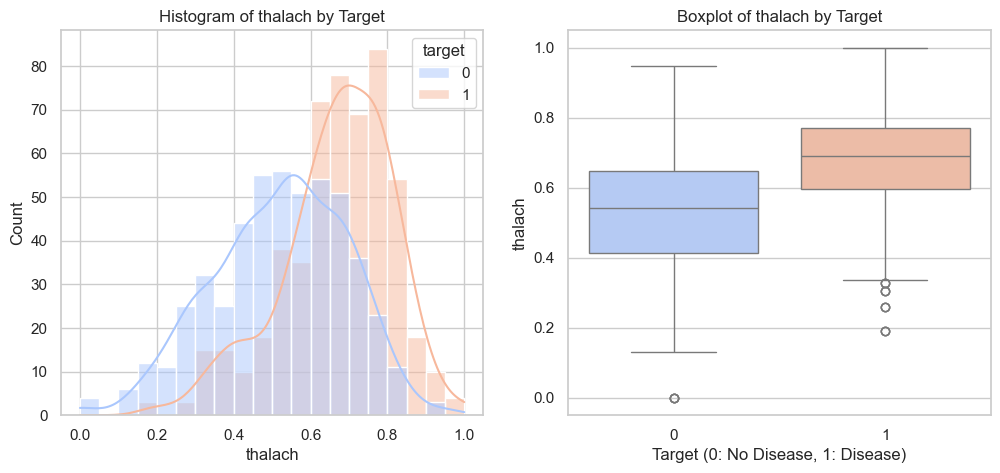

C:\Users\mrahm\AppData\Local\Temp\ipykernel_22284\4037918871.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_selected["target"].astype(str), y=df_selected[feature], palette="coolwarm")


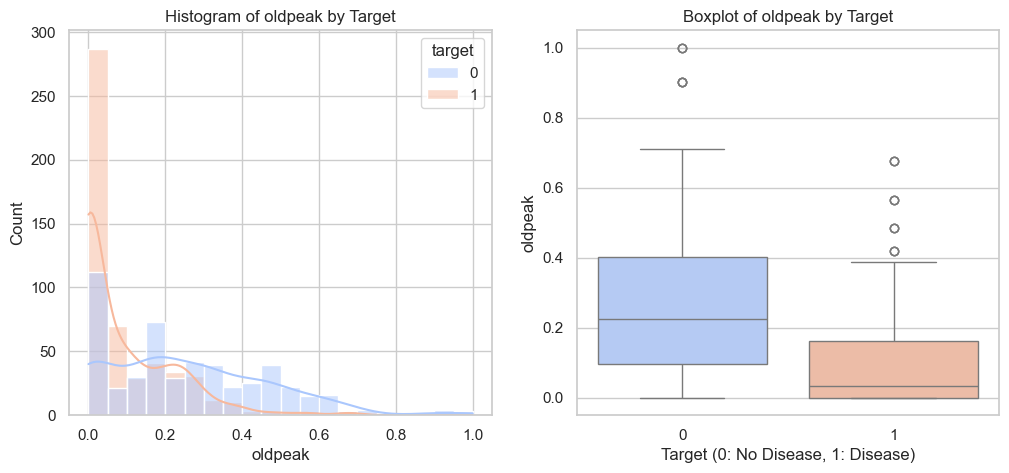

C:\Users\mrahm\AppData\Local\Temp\ipykernel_22284\4037918871.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")


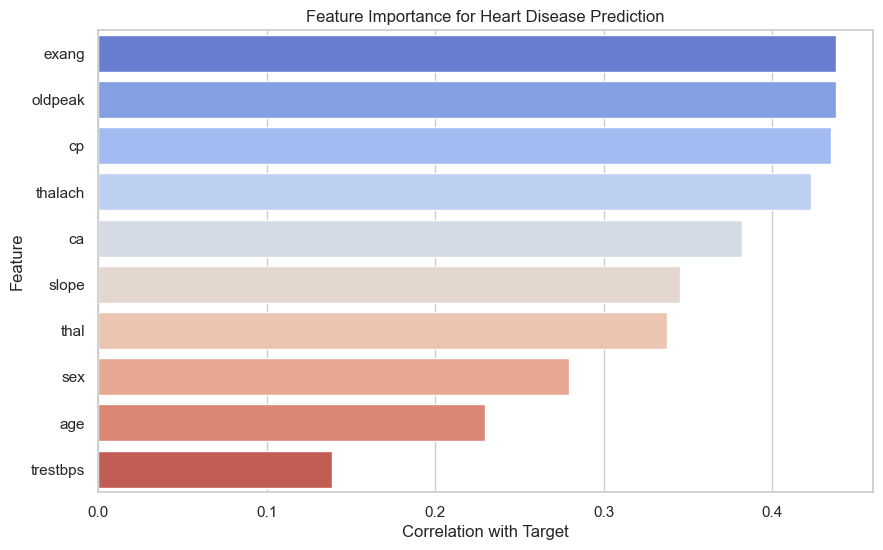

In [39]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))
selected_features = list(df_selected.columns)
if "target" in selected_features:
    selected_features.remove("target") 

for i, feature in enumerate(selected_features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_selected, x=feature, hue="target", kde=True, bins=20, palette="coolwarm")
    plt.title(f"Distribution of {feature} by Target")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

for feature in ['chol', 'fbs', 'trestbps', 'thalach', 'oldpeak']:
    if feature in df_selected.columns:  
        plt.figure(figsize=(12, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_selected, x=feature, hue="target", kde=True, bins=20, palette="coolwarm")
        plt.title(f"Histogram of {feature} by Target")
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_selected["target"].astype(str), y=df_selected[feature], palette="coolwarm")
        plt.title(f"Boxplot of {feature} by Target")
        plt.xlabel("Target (0: No Disease, 1: Disease)")
        plt.ylabel(feature)
        
        plt.show()

if "target" in df_selected.columns:
    correlation_with_target = df_selected.corr()["target"].abs().sort_values(ascending=False)[1:11]  # Exclude target itself
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")
    plt.xlabel("Correlation with Target")
    plt.ylabel("Feature")
    plt.title("Feature Importance for Heart Disease Prediction")
    plt.show()